**Core question:** Are simpler words more commonly used than less simple words? 

**Proxy for simplicity:** Number of syllables in a word

In [1]:
# Importing Libraries 

import pandas as pd
import nltk
from nltk.corpus import cmudict
import string


In [2]:
# Import simple syllable library and dictionary 

d = cmudict.dict()
def nsyl(word):
  return [len(list(y for y in x if y[-1].isdigit())) for x in d[str(word).lower()]] 

In [3]:
# Reading in SUBTLEX Frequencies

freq_data1 = pd.read_csv("SUBTLEXus74286wordstextversion.txt", sep="	", names=["Word1","FREQcount","CDcount","FREQlow","Cdlow","Freq_Per_Mil1","Log_Freq_Per_Mil1","SUBTLCD","Lg10CD"])
freq_data1 = freq_data1[["Word1","Freq_Per_Mil1","Log_Freq_Per_Mil1"]]

freq_data2 = pd.read_csv("SUBTLEXus74286wordstextversion.txt", sep="	", names=["Word2","FREQcount","CDcount","FREQlow","Cdlow","Freq_Per_Mil2","Log_Freq_Per_Mil2","SUBTLCD","Lg10CD"])
freq_data2 = freq_data2[["Word2","Freq_Per_Mil2","Log_Freq_Per_Mil2"]]


In [219]:
# Reading in synonym dataframe from eacl2017
adj=pd.read_csv("eacl2017/adjtrain.txt", sep="	", header=None, names=["Word1", "Word2","Synonym"])
noun=pd.read_csv("eacl2017/nounstrain.txt", sep="	", header=None, names=["Word1", "Word2","Synonym"])
verb=pd.read_csv("eacl2017/verbstrain.txt", sep="	", header=None, names=["Word1", "Word2","Synonym"])

frames = [adj,noun,verb]

data = pd.concat(frames)

# Filtering out antonyms
data = data[data.Synonym == 0]
data = data[["Word1", "Word2"]]

# Adding column for syllables 
data["Word1_Syll"] = ""
data["Word2_Syll"] = ""
data["Word1_Length"] = ""
data["Word2_Length"] = ""

for index, row in data.iterrows():
    row["Word1_Syll"] = nsyl(row["Word1"])[0]
    row["Word2_Syll"] = nsyl(row["Word2"])[0]
    row["Word1_Length"] = len(str(row["Word1"]))
    row["Word2_Length"] = len(str(row["Word2"]))
    
result = pd.merge(data,freq_data1,on="Word1")
final_df = pd.merge(result,freq_data2,on="Word2")

In [239]:
final_df['Syll_Delta'] = final_df['Word1_Syll'] - final_df['Word2_Syll']
final_df['Freq_Delta'] = final_df['Log_Freq_Per_Mil1'] - final_df['Log_Freq_Per_Mil2']
final_df['Length_Delta'] = final_df['Word1_Length'] - final_df['Word2_Length']

final_df

,Word1,Word2,Word1_Syll,Word2_Syll,Word1_Length,Word2_Length,Freq_Per_Mil1,Log_Freq_Per_Mil1,Freq_Per_Mil2,Log_Freq_Per_Mil2,Syll_Delta,Freq_Delta,Length_Delta
0,precipitous,steep,4,1,11,5,0.12,0.8451,2.45,2.1004,3,-1.2553,6
1,abrupt,steep,2,1,6,5,1.14,1.7709,2.45,2.1004,1,-0.3295,1
2,mystical,mysterious,3,4,8,10,2.82,2.1614,15.00,2.8842,-1,-0.7228,-2
3,dim,mysterious,1,4,3,10,4.76,2.3874,15.00,2.8842,-3,-0.4968,-7
4,secret,mysterious,2,4,6,10,109.51,3.7471,15.00,2.8842,-2,0.8629,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789,account,value,2,2,7,5,44.71,3.3581,21.51,3.0406,0,0.3175,2
4790,relate,detail,2,2,6,6,4.75,2.3856,19.39,2.9956,0,-0.6100,0
4791,braid,lace,1,1,5,4,0.94,1.6902,3.71,2.2788,0,-0.5886,1
4792,groom,prepare,1,2,5,7,7.82,2.6021,33.55,3.2335,-1,-0.6314,-2


In [240]:
final_df.to_csv("full_df_data.csv")

In [1]:
#Calculate correlations 

final_df = final_df.astype({'Syll_Delta':'float','Freq_Delta':'float','Length_Delta':'float'})

corr_length = final_df["Freq_Delta"].corr(final_df["Length_Delta"])
print("the correlation between frequency and word length delta is", corr_length)

corr_syll = final_df["Freq_Delta"].corr(final_df["Syll_Delta"])
print("the correlation between frequency and syllable delta is", corr_length)

NameError: name 'final_df' is not defined

In [242]:
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

<Axes: xlabel='Freq_Delta', ylabel='Syll_Delta'>

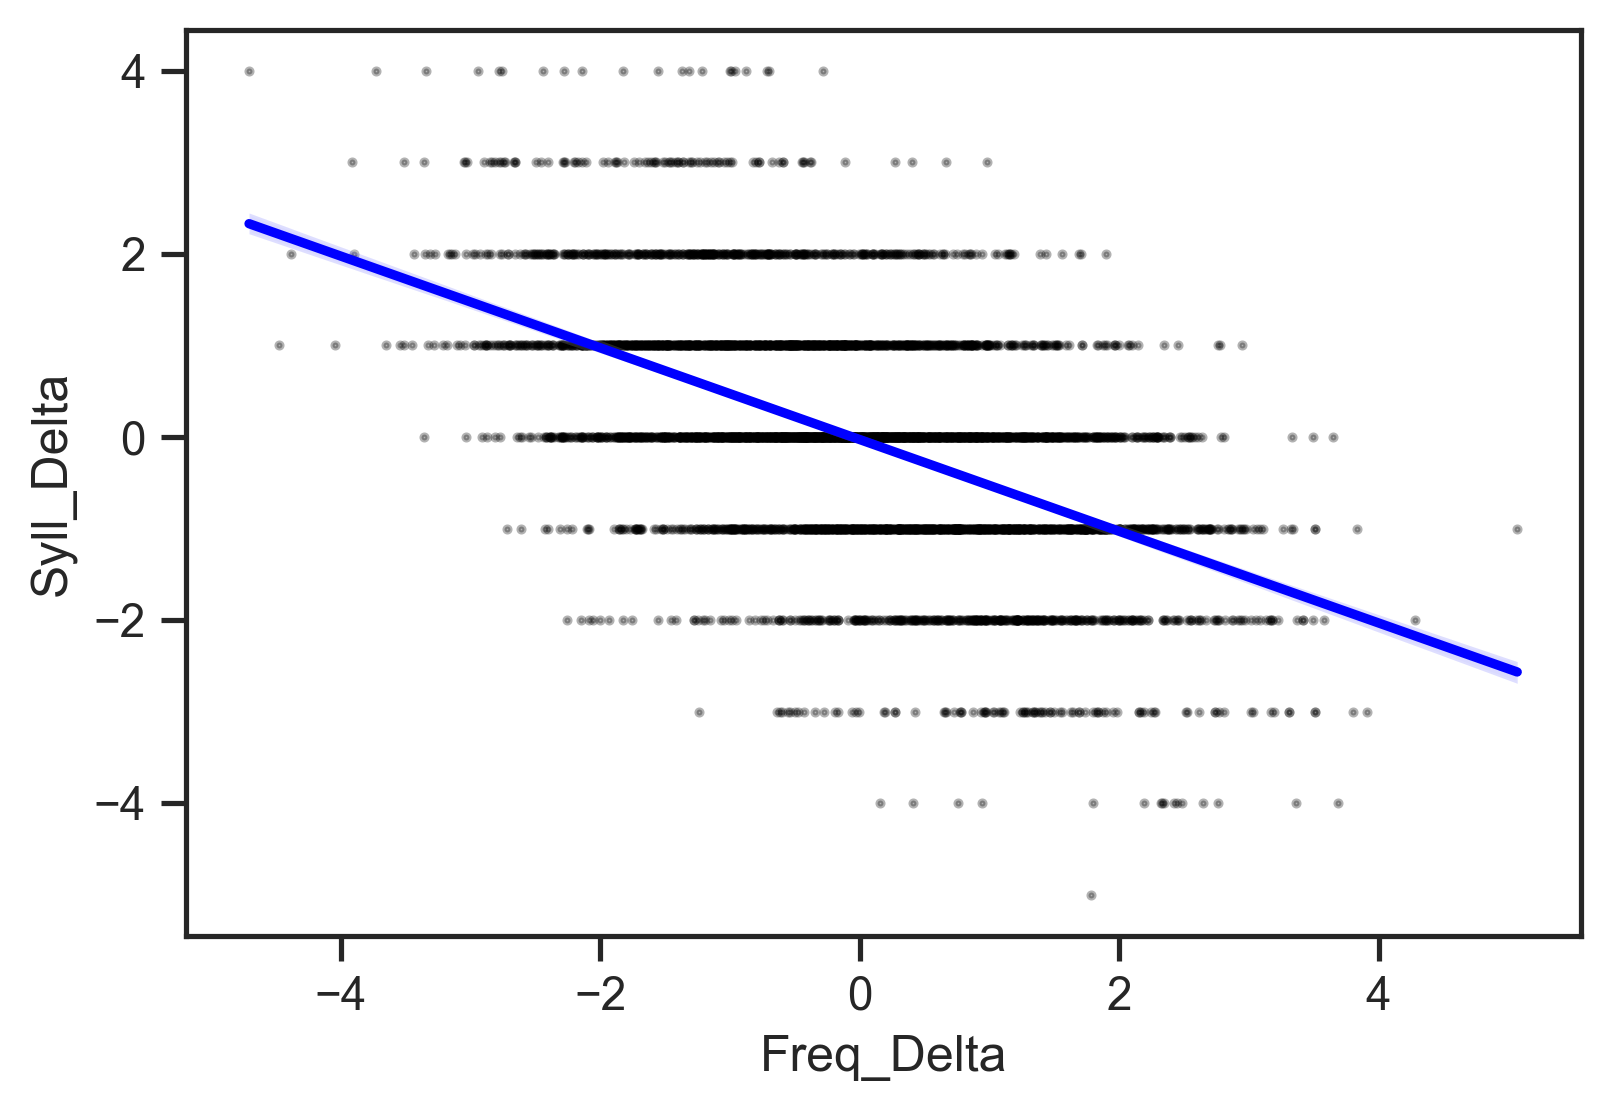

In [244]:
sns.regplot(x = final_df["Freq_Delta"], y = final_df["Syll_Delta"],
            scatter_kws = {"color": "black", "alpha": 0.3,'s':2},
            line_kws = {"color": "blue"},
            ci = 95) 

<Axes: xlabel='Freq_Delta', ylabel='Length_Delta'>

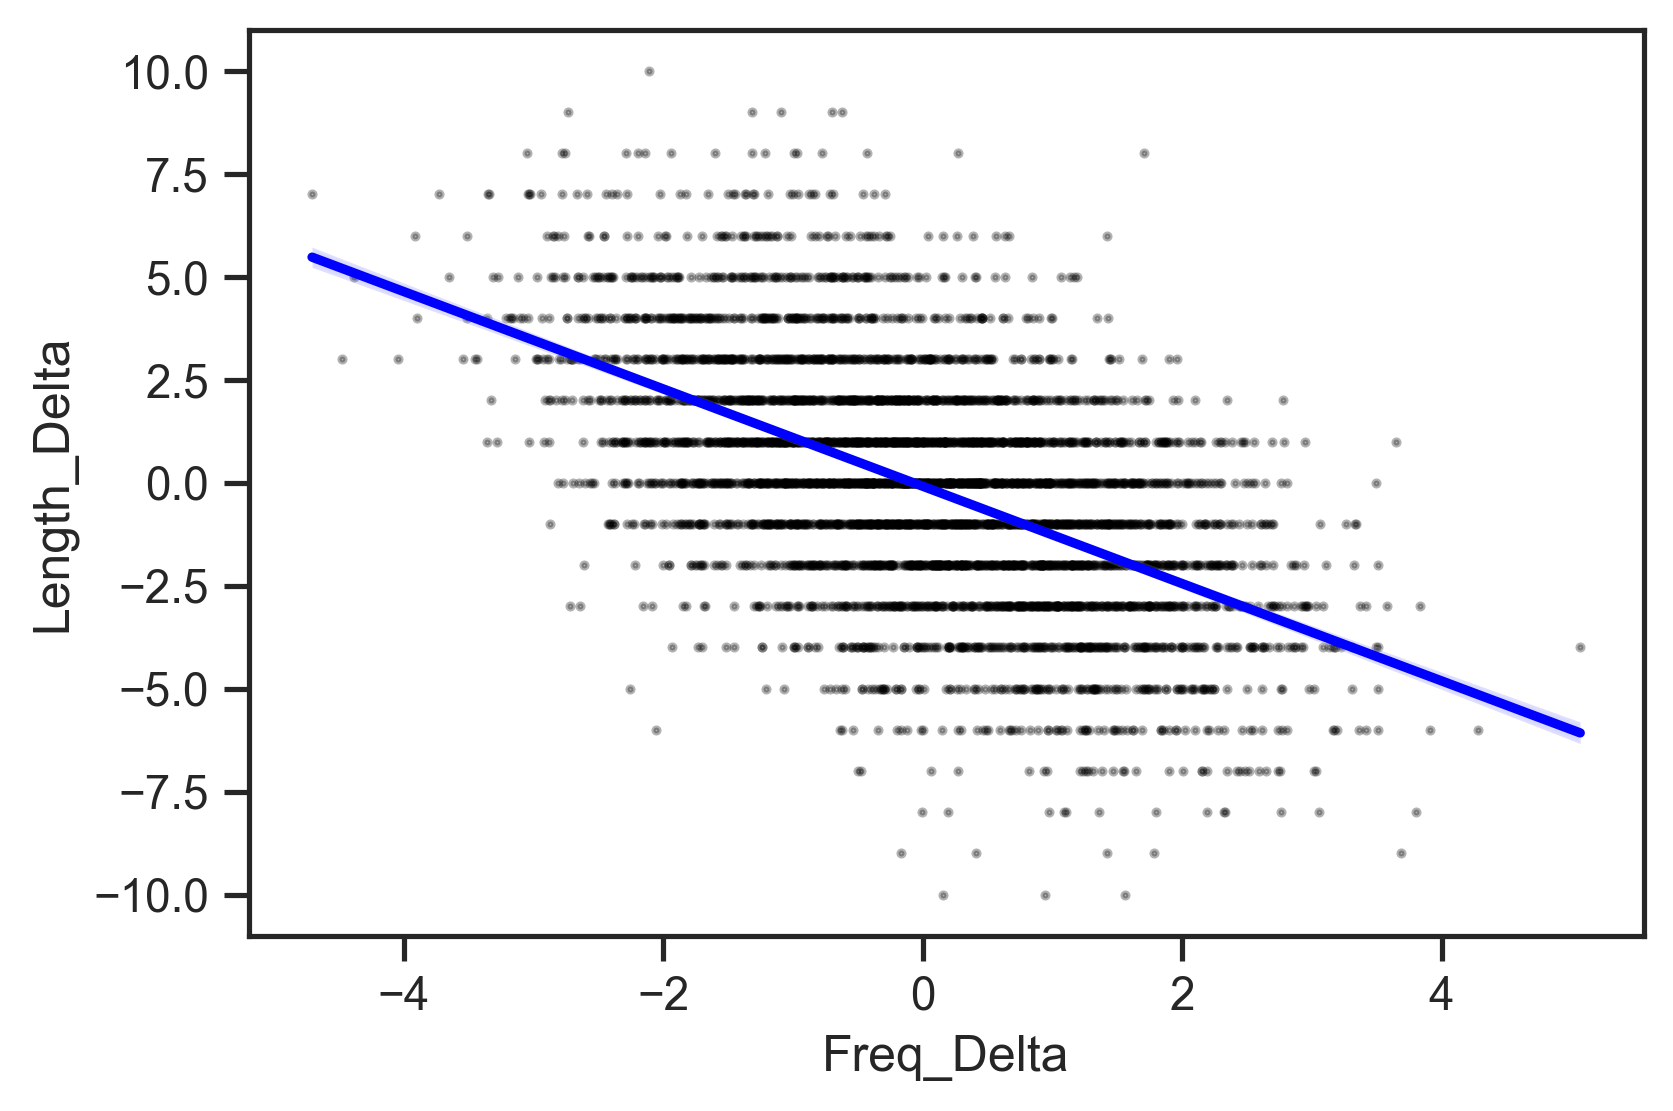

In [245]:
sns.regplot(x = final_df["Freq_Delta"], y = final_df["Length_Delta"],
            scatter_kws = {"color": "black", "alpha": 0.3,'s':2},
            line_kws = {"color": "blue"},
            ci = 95) 